In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

root="/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/"
crypto_paths = sorted(list(glob.iglob(root + "*.txt" )))


In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
import pandas as pd
from hmmlearn import hmm

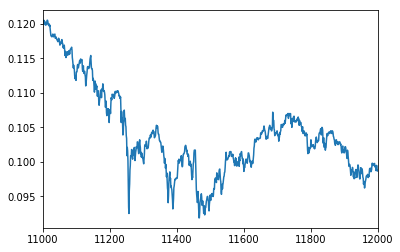

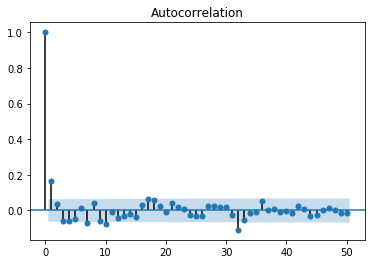

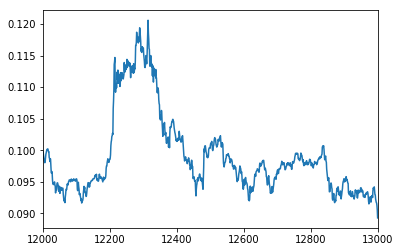

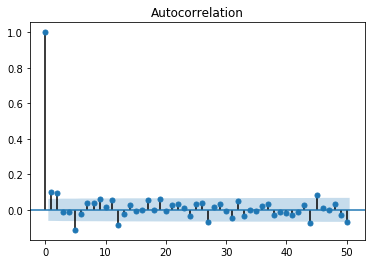

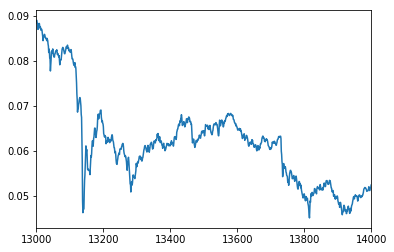

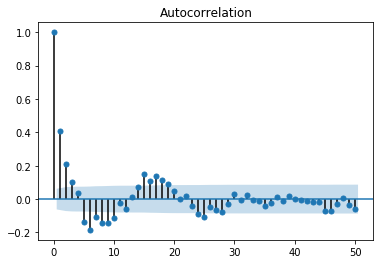

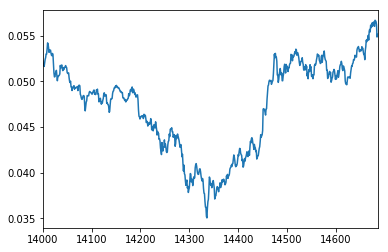

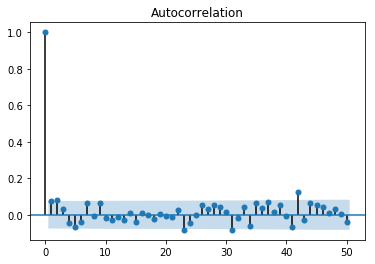

In [4]:
df = pd.read_csv(root + "bts.v.txt")
pct_changes = df["<CLOSE>"].pct_change()

#df["<CLOSE>"].plot()
#plt.show()

#plt.plot(pct_changes[:-500])
#plt.show()


#sm.graphics.tsa.plot_acf(pct_changes[1:-500], lags=50)
#plt.show()
#sm.graphics.tsa.plot_acf(pct_changes[-500:], lags=50)
#plt.show() 

step = 1000

for i in range(11000,len(df),step):
    df["<CLOSE>"].iloc[i:i+step].plot()
    plt.show()
    
    r = pct_changes.iloc[i:i+step]
    sm.graphics.tsa.plot_acf(r, lags=50)
    plt.show() 

In [9]:
def find_autocorrelated_sections(time_series, minsection_size=100, lags=20):
    
    level = np.zeros_like(time_series)
    
    for i in range(0,len(time_series),minsection_size):
        
        acs = tsa.stattools.acf(time_series[i:i+minsection_size], nlags=lags)
        total = np.mean(np.abs(acs[1:]))
        level[i:i+minsection_size] = total
    return level
        
    
    

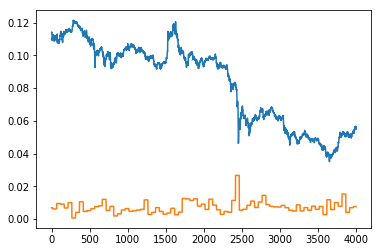

In [18]:
pct_changes = np.array(df["<CLOSE>"].pct_change())[1:]
closing_prices = np.array(df["<CLOSE>"]).reshape(-1,1) 

acs = find_autocorrelated_sections(pct_changes,minsection_size=50,lags=10)
plt.plot(closing_prices[-4000:])
plt.plot((acs[-4000:]-np.min(acs))/10)
plt.show()

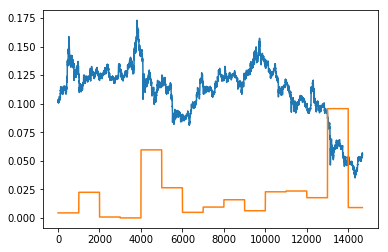

In [54]:
closing_prices = np.array(df["<CLOSE>"]).reshape(-1,1) 
hmm_model = model = hmm.GMMHMM(n_components=2, covariance_type="full")
hmm_model.fit(closing_prices)



GMMHMM(algorithm='viterbi', covariance_type='full',
       covars_prior=array([[[[0.]]],


       [[[0.]]]]),
       covars_weight=array([[-3.],
       [-3.]]), init_params='stmcw',
       means_prior=array([[[0.]],

       [[0.]]]),
       means_weight=array([[0.],
       [0.]]), min_covar=0.001, n_components=2,
       n_iter=10, n_mix=1, params='stmcw', random_state=None,
       startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=False,
       weights_prior=array([[1.],
       [1.]]))

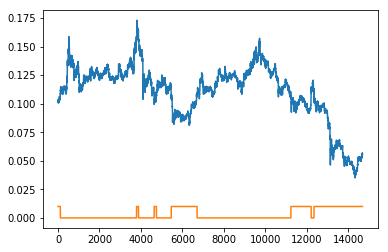

In [55]:
plt.plot(closing_prices[:])
plt.plot(hmm_model.predict(closing_prices)[:]/100)
plt.show()

In [121]:
d = {}
for p in crypto_paths:
    df = pd.read_csv(p)
    pct_changes = df["<CLOSE>"].pct_change()
    auto = tsa.stattools.acf(np.array(pct_changes[1:]))
    d[p] = auto
    

0.028449198287252064
0.07160299748227227
0.05735191280488847
0.030482469534902752
0.11310737072617855
0.06566248651855086
0.05386564946778177
0.038329333053353516
0.11347113845598131
0.059445925874278
0.03400886815816006
0.04757243726058454
0.04598977159059766
0.13533065304498032
0.04343318060979025
0.04652600357916967
0.19403725224770857
0.14234884836481373
0.06461061245414473
0.06392078510052003
0.049074119691920985
0.04463958947760568
0.030114245298520616
0.06964804428215383
0.06557982046569191
0.1788494099825883
0.11767840970323837
0.09422557167866279
0.06647855845101801
0.08177371257541859
0.05779323860736921
0.018652028696186457
0.02943755390358193
0.10206602906971134
0.07868126091627317
0.06818154591978874
0.11899744224544168
0.04684667687027834
0.0562176696783603
0.06182381000026962
0.04404748943373361
0.04361874759408997
0.03549707973751153
0.03201288592080284
0.04365122300768906
0.061412599368774155
0.05757787813570858
0.15864220553914118
0.03639330968519004
0.027408699524912

/home/cehmann/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


nan
0.17110576131048955
0.12701685264095727
0.06302069850265565
0.09321445662238641
0.08021234705465081


In [122]:
sorted(d.items(), key=lambda x: np.max(x[1][1:]),reverse=True)

[('/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/qnt.v.txt',
  array([ 1.00000000e+00, -3.15644188e-01, -7.03194306e-03, -1.73225888e-03,
         -1.35198063e-02,  1.51603951e-02, -5.05067457e-03, -6.48527520e-03,
         -2.08356475e-03,  3.55990990e-03,  9.97193508e-04, -1.17520842e-03,
         -1.51780980e-03,  1.71590376e-02, -6.95302291e-03, -3.82827705e-03,
         -3.38473734e-04, -1.09635840e-01,  3.21680629e-01, -1.00905236e-01,
         -1.41509707e-03, -5.20617057e-03,  8.01207807e-05,  3.15323100e-04,
          3.70849583e-04, -3.37709394e-04, -5.35780916e-05,  1.59525320e-03,
         -9.24374894e-03, -9.57215057e-04,  3.24085237e-03,  1.06501735e-06,
          9.49846176e-03, -3.33189382e-03, -4.04121612e-03,  3.96275993e-03,
          5.05975488e-05, -3.34943432e-04, -3.92368022e-03,  4.04545409e-04,
         -2.98163329e-03])),
 ('/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/pax.v.txt',
  array([ 1.00000000e+00, -5.32908823e-

(96,)
(96,)


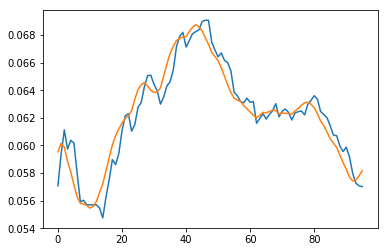

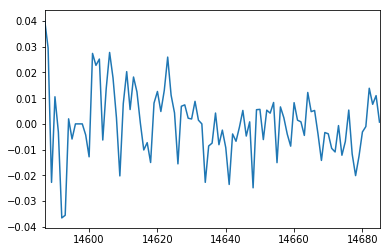

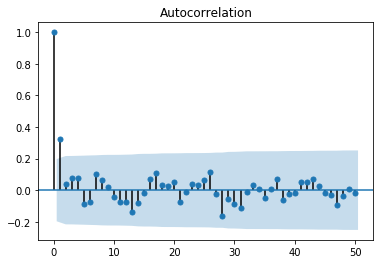

In [84]:
df = pd.read_csv(root + "bts.v.txt").iloc[-100:]

df['MA'] = df["<CLOSE>"].rolling(window=5).mean()
close= np.array(df["<CLOSE>"].iloc[:-4])
print(close.shape)
ma = np.array(df["MA"][4:])
print(ma.shape)
plt.plot(close)
plt.plot(ma)
plt.show()
pct_changes = df["<CLOSE>"].pct_change().iloc[1:]
pct_changes.plot()
plt.show()
sm.graphics.tsa.plot_acf(pct_changes, lags=50)
plt.show()
#sm.graphics.tsa.plot_acf(pct_changes[-500:], lags=50)
#plt.show()


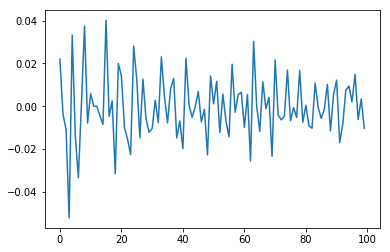

In [64]:
diff = np.array(pct_changes.iloc[1:]) - np.array(pct_changes.iloc[:-1])
plt.plot(diff[-100:])
plt.show()

In [70]:
diff[1:].mean()

4.02194094808537e-06

nan

In [4]:

train = pct_changes.iloc[-1000:-500]
test = pct_changes.iloc[-500:]






In [6]:
import pmdarima as pm
Arima_model=pm.auto_arima(train, start_p=5, start_q=5, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=7, stepwise=True, seasonal=False, information_criterion='aic', trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)


/home/cehmann/.local/lib/python3.6/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=-3644.255, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3351.537, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3487.344, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3574.268, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3353.536, Time=0.02 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=-3645.687, Time=0.96 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=-3645.253, Time=0.35 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(4,1,6)(0,0,0)[0] intercept   : AIC=-3646.247, Time=0.74 sec
 ARIMA(3,1,6)(0,0,0)[0] intercept   : AIC=-3645.569, Time=0.35 sec
 ARIMA(5,1,6)(0,0,0)[0] intercept   : AIC=-3639.785, Time=0.23 sec
 ARIMA(4,1,7)(0,0,0)[0] intercept   : AIC=-3646.018, Time=1.06 sec
 ARIMA(3,1,7)(0,0,0)[0] intercept   : AIC=-3643.367, Time=1.91 sec
 ARIMA(5,1,7)(0,0,0)[0] intercept   : AIC=-3642.701, Time=1.11 sec
 ARIMA(4,1,6)(0,0,0)[0]  

In [37]:

prediction  = Arima_model.predict(10,test[:-10])
prediction.shape

(10,)

(1,)

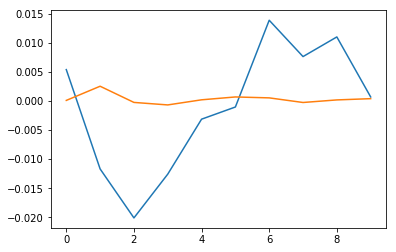

In [38]:
plt.plot(np.array(test)[-10:])
plt.plot(prediction)

plt.show()

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/abbc.v.txt


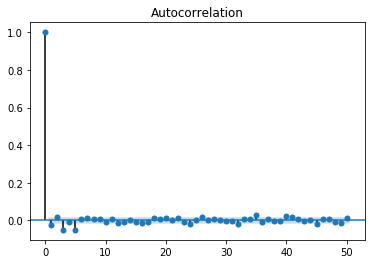

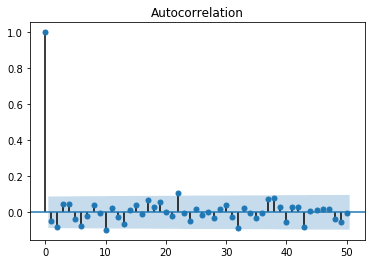

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/ada.v.txt


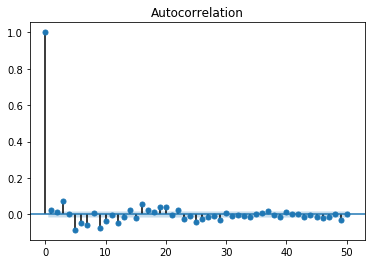

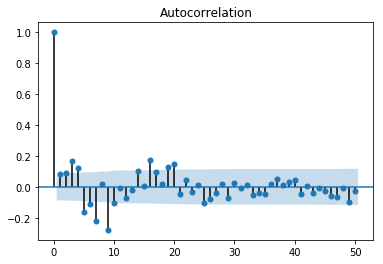

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/algo.v.txt


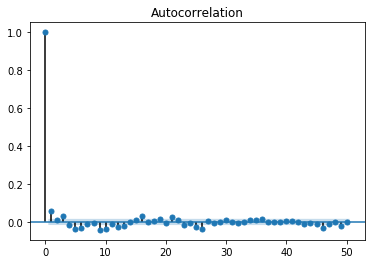

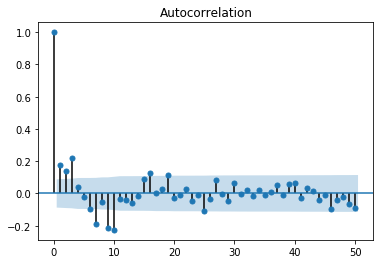

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/ampl.v.txt


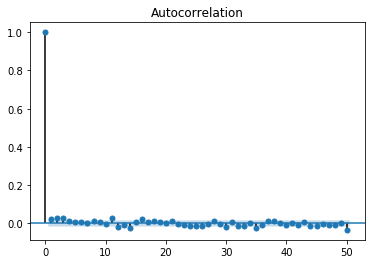

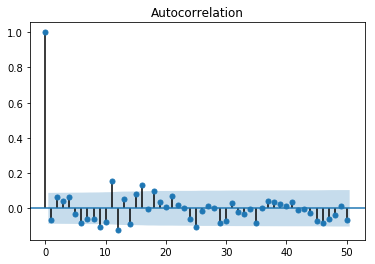

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/ant.v.txt


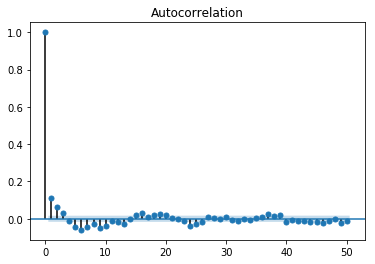

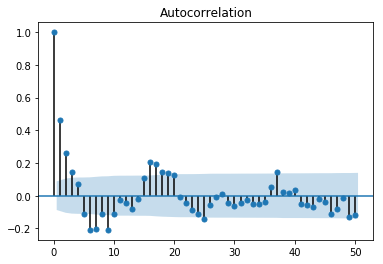

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/ardr.v.txt


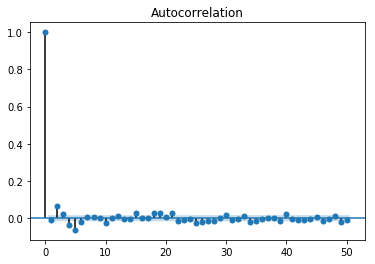

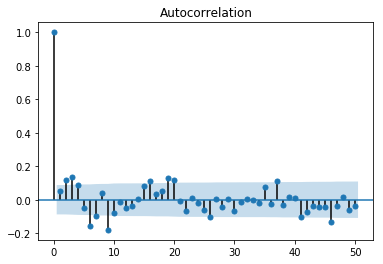

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/atom.v.txt


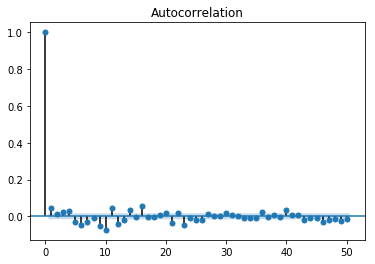

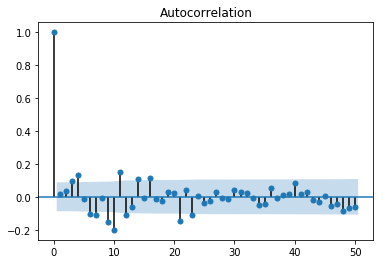

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/band.v.txt


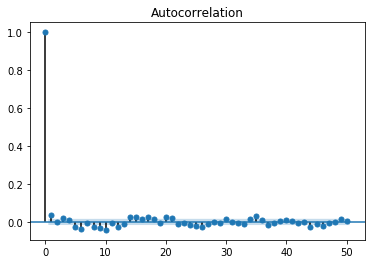

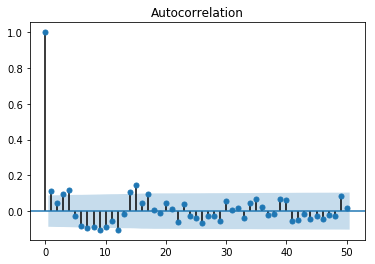

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bat.v.txt


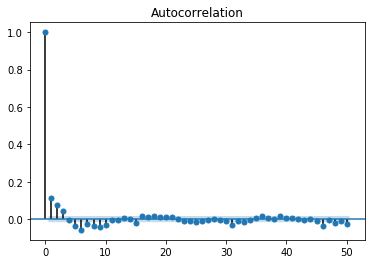

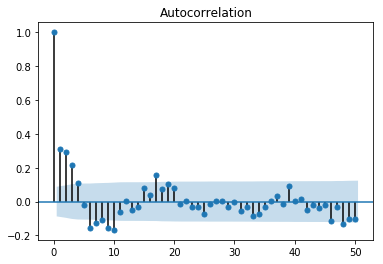

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bcd.v.txt


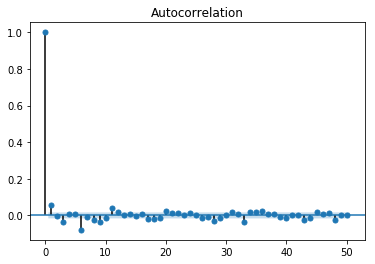

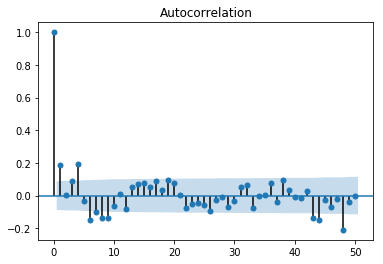

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bch.v.txt


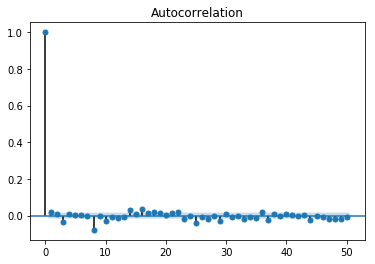

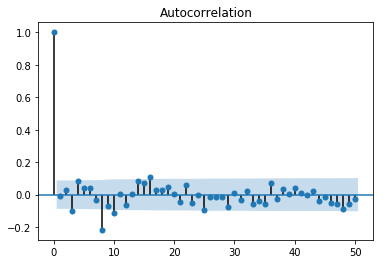

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bnb.v.txt


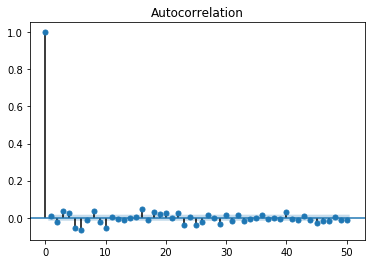

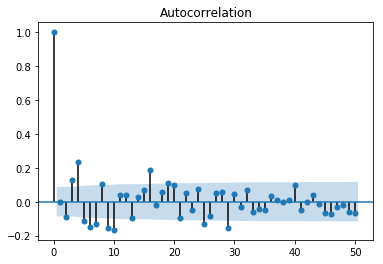

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bnt.v.txt


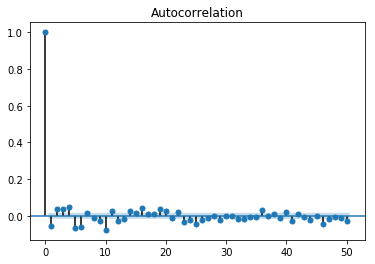

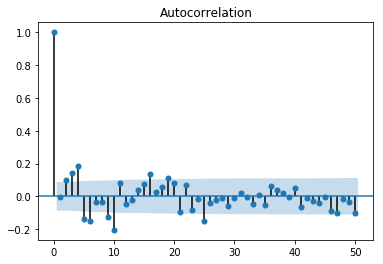

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bsv.v.txt


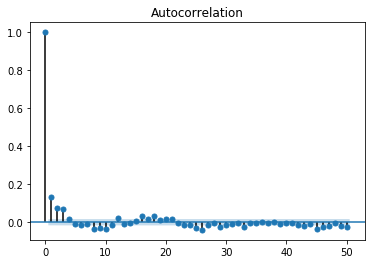

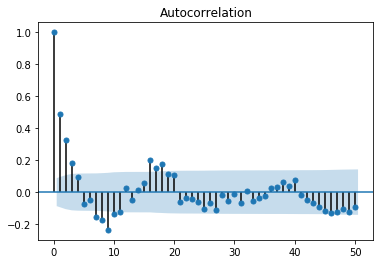

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/btc.v.txt


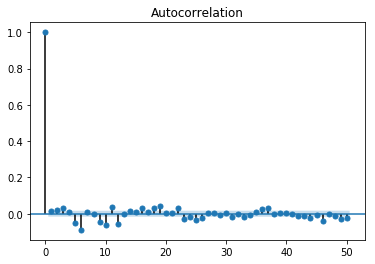

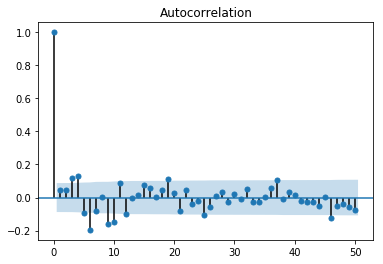

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/btg.v.txt


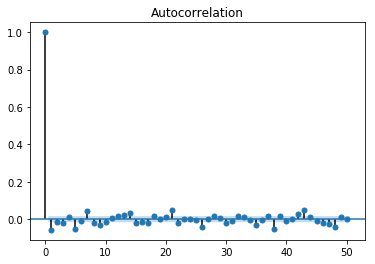

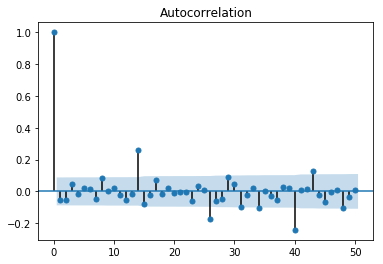

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/btm.v.txt


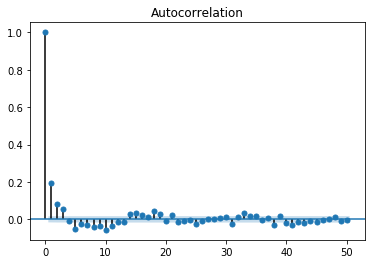

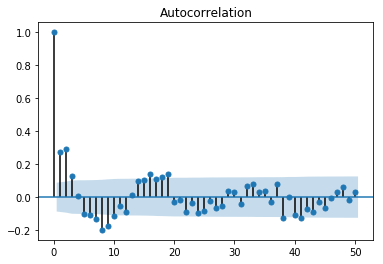

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/bts.v.txt


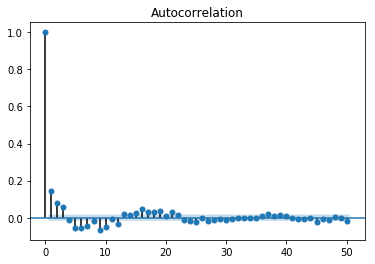

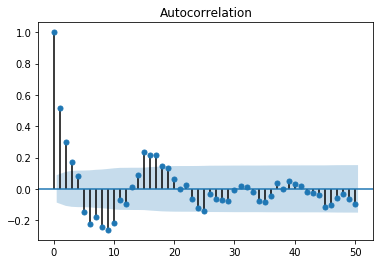

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/btt.v.txt


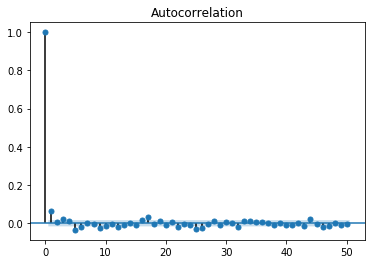

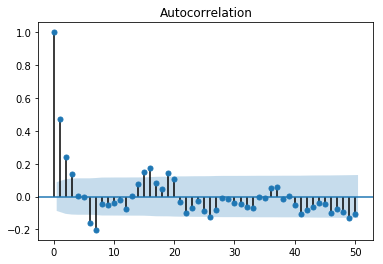

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/busd.v.txt


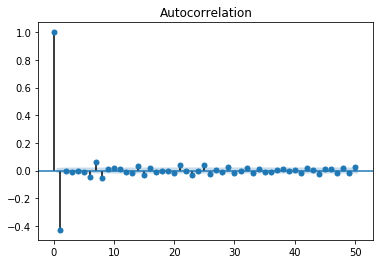

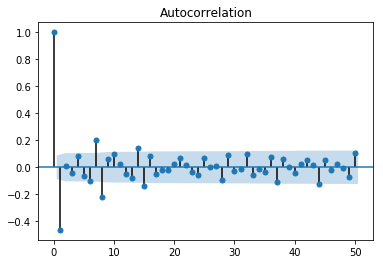

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/cel.v.txt


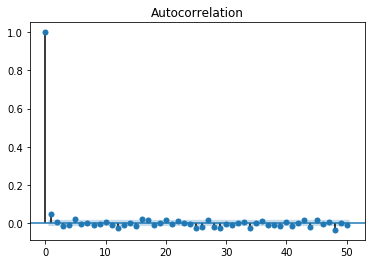

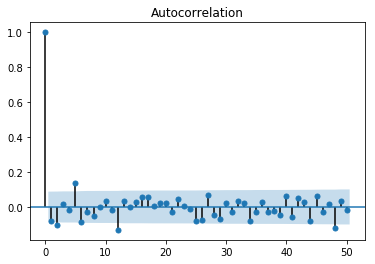

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/chsb.v.txt


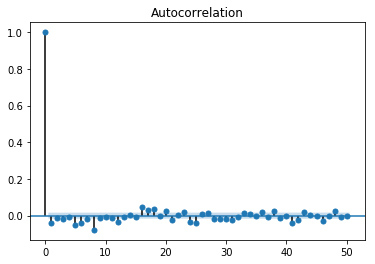

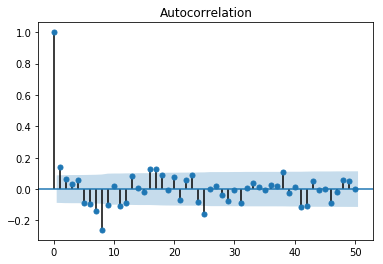

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/chz.v.txt


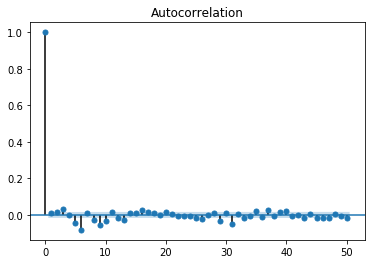

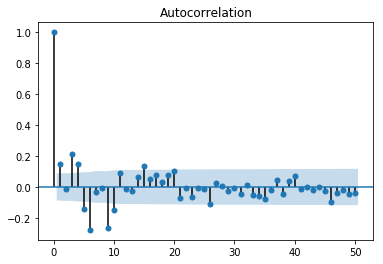

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/ckb.v.txt


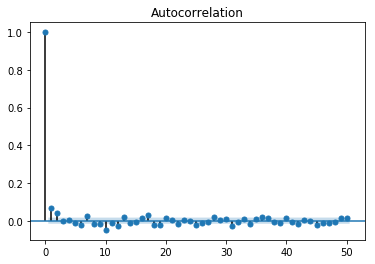

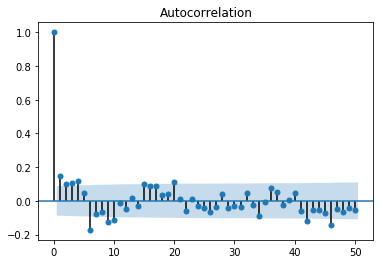

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/comp.v.txt


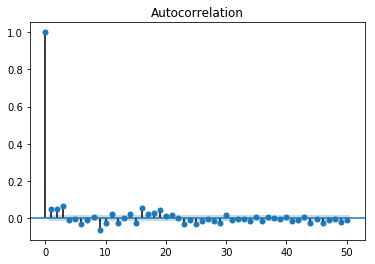

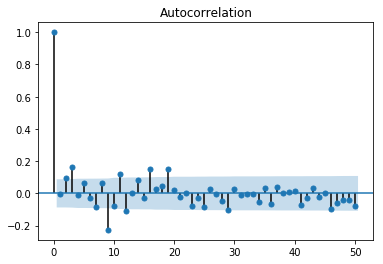

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/cro.v.txt


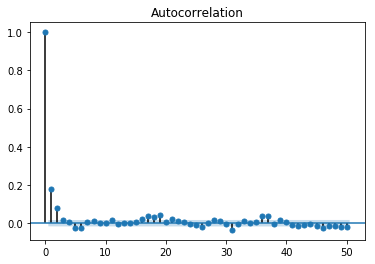

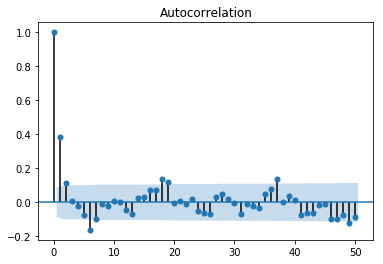

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/dai.v.txt


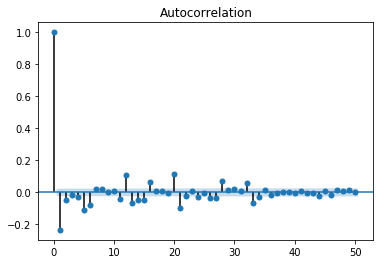

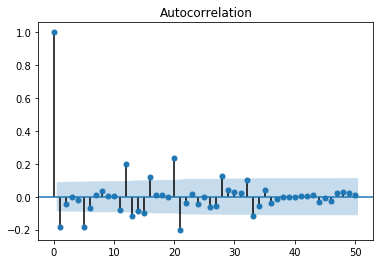

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/dash.v.txt


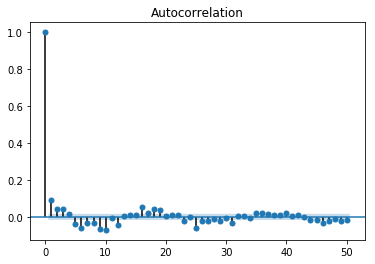

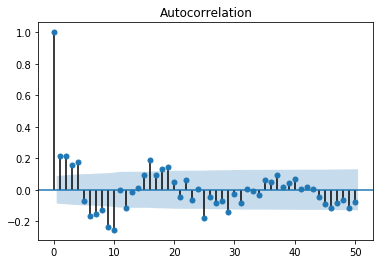

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/dcr.v.txt


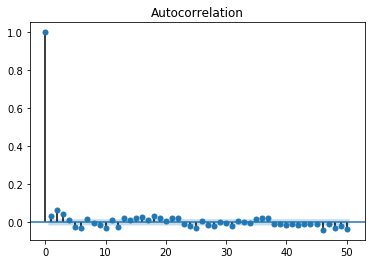

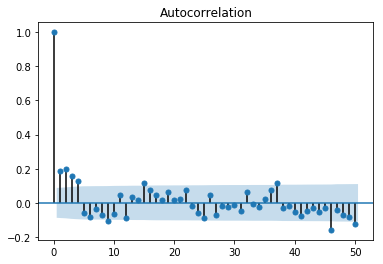

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/dgb.v.txt


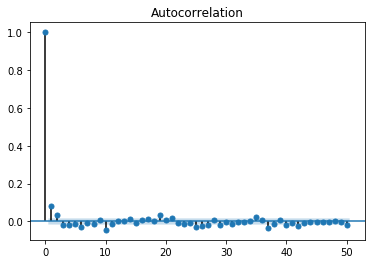

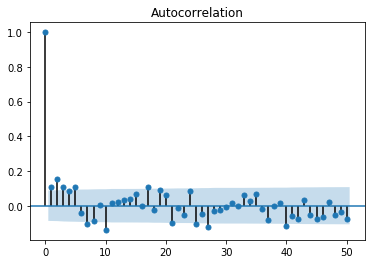

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/dgd.v.txt


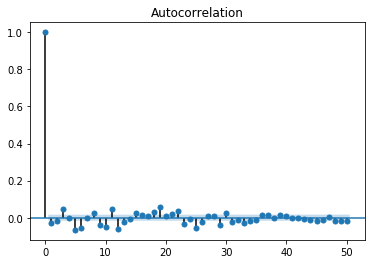

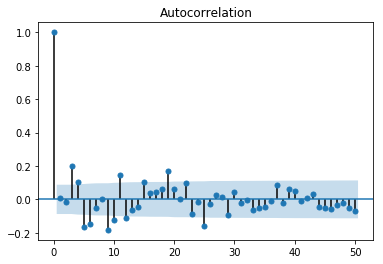

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/divi.v.txt


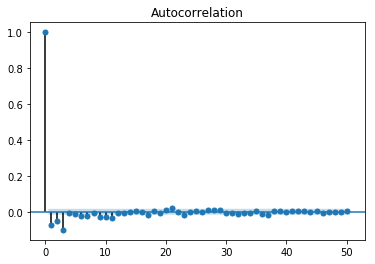

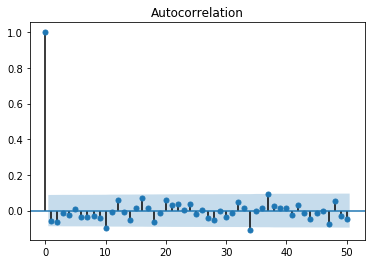

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/doge.v.txt


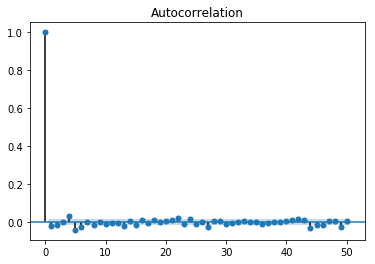

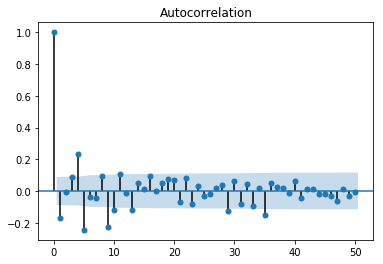

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/dx.v.txt


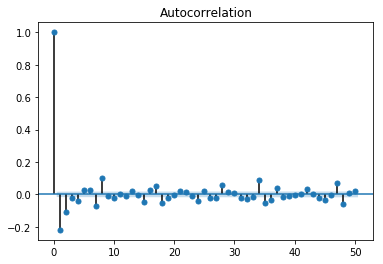

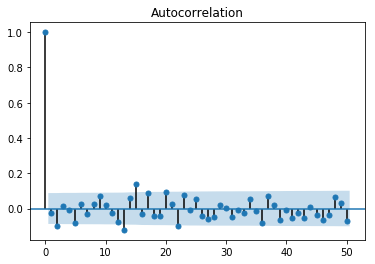

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/enj.v.txt


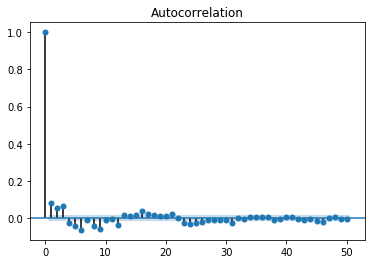

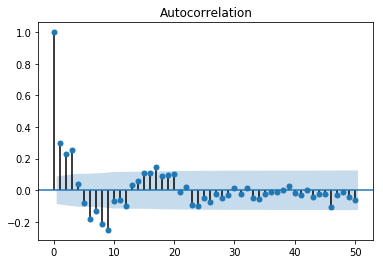

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/eos.v.txt


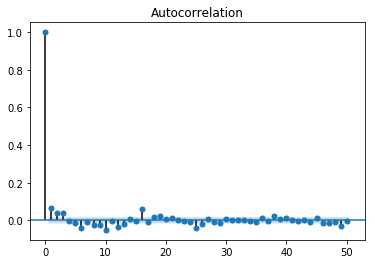

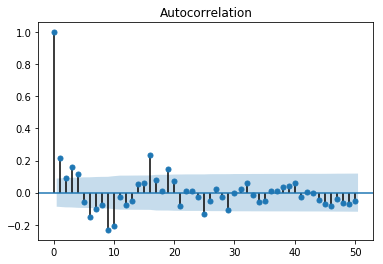

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/erd.v.txt


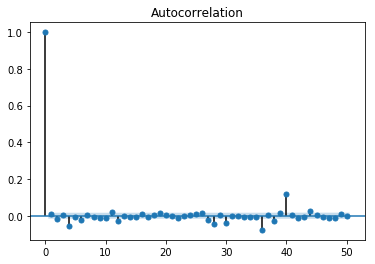

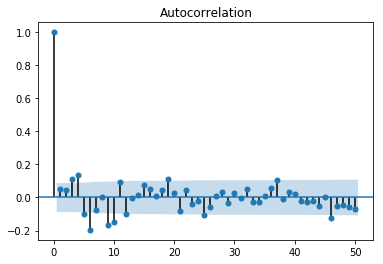

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/etc.v.txt


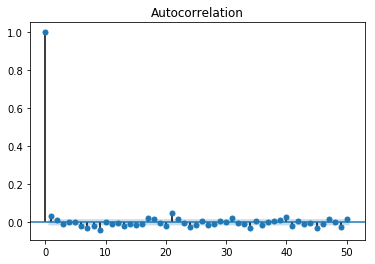

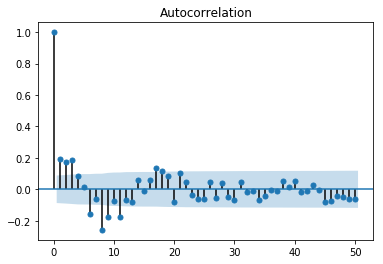

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/eth.v.txt


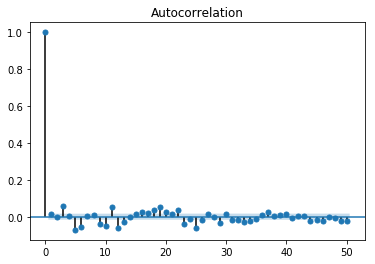

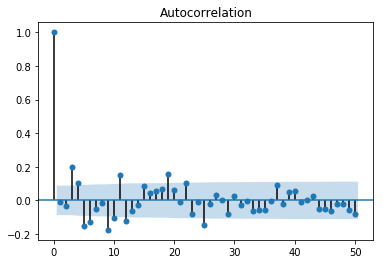

/home/cehmann/workspaces/stonks/data/5 min/world/cryptocurrencies/ftt.v.txt


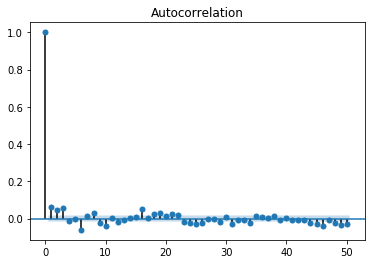

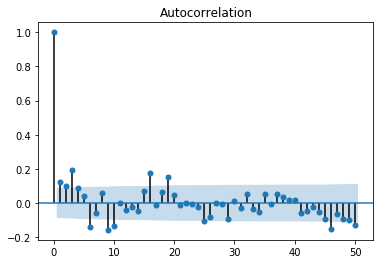

In [47]:

for path in crypto_paths[:40]:
    print(path)
    df = pd.read_csv(path)
    pct_changes = df["<CLOSE>"].pct_change()
    sm.graphics.tsa.plot_acf(pct_changes[1:], lags=50)
    plt.show()
    sm.graphics.tsa.plot_acf(pct_changes[1:][-500:], lags=50)
    plt.show()

In [22]:
pct_changes

13686         NaN
13687   -0.000240
13688    0.002197
13689    0.001253
13690   -0.001036
13691    0.000718
13692   -0.000055
13693   -0.004233
13694    0.002197
13695    0.000867
13696   -0.003150
13697   -0.001949
13698   -0.000055
13699   -0.003512
13700   -0.000535
13701   -0.000732
13702   -0.003434
13703    0.000192
13704    0.002098
13705    0.000484
13706   -0.002929
13707    0.001535
13708   -0.002196
13709   -0.001296
13710   -0.003368
13711   -0.000960
13712   -0.005455
13713   -0.006758
13714   -0.000556
13715   -0.003591
           ...   
14656    0.015376
14657   -0.005036
14658   -0.010253
14659   -0.001487
14660    0.011576
14661   -0.003743
14662   -0.005590
14663   -0.001701
14664    0.032219
14665   -0.005102
14666    0.000592
14667    0.001939
14668   -0.004412
14669   -0.009250
14670   -0.005193
14671   -0.009515
14672   -0.003936
14673   -0.000656
14674   -0.014393
14675   -0.007648
14676    0.016062
14677   -0.014701
14678   -0.018927
14679   -0.003172
14680    0